/var/folders/gk/qhcz_3450yx_v4_l16918_4r0000gn/T/ipykernel_3319/2144107162.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data1 = np.genfromtxt("../logs/0926/arlog_20230926170524.csv", delimiter=',', skip_header=1, usecols=(0, 1, 2, 3, 4, 5, 6), dtype=None)
/var/folders/gk/qhcz_3450yx_v4_l16918_4r0000gn/T/ipykernel_3319/2144107162.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data2 = np.genfromtxt("../logs/0926/patlog_20230926170521.csv", delimiter=',', skip_header=1, usecols=(0, 1), dtype=None, converters={1: lambda x: 'S' if x.strip() == 'Spinning' else 'P'})


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (11).

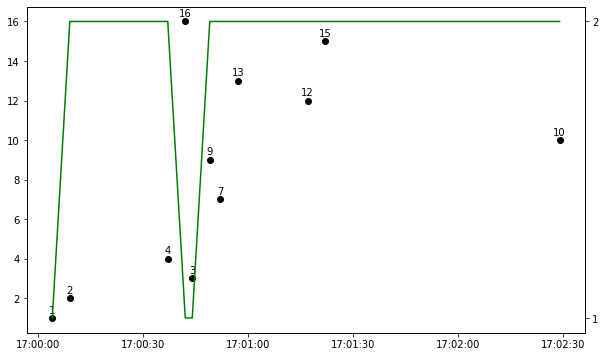

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data as numpy arrays
data1 = np.genfromtxt("../logs/0926/arlog_20230926170524.csv", delimiter=',', skip_header=1, usecols=(0, 1, 2, 3, 4, 5, 6), dtype=None)
data2 = np.genfromtxt("../logs/0926/patlog_20230926170521.csv", delimiter=',', skip_header=1, usecols=(0, 1), dtype=None, converters={1: lambda x: 'S' if x.strip() == 'Spinning' else 'P'})

rostime1 = [row[3].decode("utf-8") for row in data1]  # Decode bytes to strings
rostime2 = [row[0].decode("utf-8") for row in data2]  # Decode bytes to strings

# Remove spaces from 'rostime' values
rostime1 = [rt.replace(" ", "") for rt in rostime1]
rostime2 = [rt.replace(" ", "") for rt in rostime2]

state = [row[6] for row in data1]
random_no = [row[2] for row in data1]
behave_val = [row[4] for row in data1]
behavior = [''] * len(rostime1)  # Ensure behavior list matches the length of rostime1
ID = [row[0] for row in data1]

# Update behavior based on available data
for i, row in enumerate(data2):
    if len(row) > 1:
        if i < len(behavior):
            behavior[i] = row[1]

# Determine which 'Ros Time' array to use based on the longer one
if len(rostime1) >= len(rostime2):
    rostime = rostime1[:len(rostime2)]
else:
    rostime = rostime2[:len(rostime1)]

# Convert 'rostime' to datetime objects for better x-axis representation
import datetime
rostime = [datetime.datetime.strptime(rt, "%H:%M:%S") for rt in rostime]

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot ID as dots with numbers next to them (ignore the axis) without lines
ax1.scatter(rostime, ID, color='black', marker='o', label='ID', zorder=5)
for i, txt in enumerate(ID):
    ax1.annotate(txt, (rostime[i], ID[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot State as a line graph on the right-hand side y-axis with custom labels
state_labels = ['Patrol' if s == 1 else 'Explore' for s in state]
ax2 = ax1.twinx()
ax2.plot(rostime, state, color='green', label='State')
ax2.set_yticks([1, 2])
ax2.set_yticklabels(state_labels)

# Plot Behavior on the left-hand side y-axis as dots with "S" or "P" labels
behavior_labels = ['S' if b == 'Spinning' else 'P' for b in behavior]
ax1.scatter(rostime, [0] * len(rostime), color='red', marker='s', label='Behaviour', s=30)
for i, b_label in enumerate(behavior_labels):
    ax1.annotate(b_label, (rostime[i], 0), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

# Plot Random No on the left-hand side y-axis as a line graph
ax1.plot(rostime, random_no, color='blue', label='Random No')

# Plot Behave Val on the left-hand side y-axis as a line graph
ax1.plot(rostime, behave_val, color='purple', label='Behave Val')

# Set the labels for the left and right y-axes
ax1.set_ylabel('Random No / Behave Val')
ax2.set_ylabel('State (Patrol/Explore)')

# Set the title and legend
ax1.set_title('Data Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


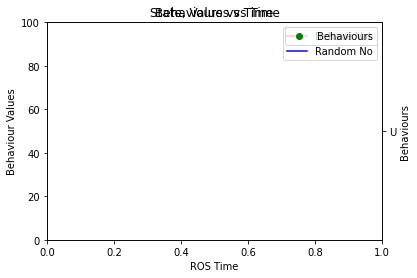

In [32]:
import numpy as np
import matplotlib.pyplot as plt 

# Load data
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',')
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',')

# Extract columns  
rostime1 = data1[:,3] 
state1 = data1[:,6]
behave_val1 = data1[:,4]
random_no1 = data1[:,5]

rostime2 = data2[:,0]
behave2 = data2[:,1] 

# Handle nan values
behave2 = np.array([b if not np.isnan(b) else 'Unknown' for b in behave2])

# Map behaviours
behave_map = {'Spinning':'S', 'Pausing':'P'}
behave2 = np.array([behave_map.get(b, 'U') for b in behave2])

# Create figure
fig, ax1 = plt.subplots()

# Plot state as stepped line 
ax1.step(rostime1, state1, where='post')
ax1.set_ylabel('State')

# Plot values as lines
ax1.plot(rostime1, behave_val1, color='red', label='Behave Val')
ax1.plot(rostime1, random_no1, color='blue', label='Random No')
ax1.set_ylabel('Behaviour Values')
ax1.set_ylim([0, 100])

# Plot behaviours as dots
ax2 = ax1.twinx()  
ax2.plot(rostime2, behave2, 'o', color='green', label='Behaviours')
ax2.set_ylabel('Behaviours')

# Clean rostime1 by removing NaN and Inf values
rostime1 = rostime1[~np.isnan(rostime1)]
rostime1 = rostime1[np.isfinite(rostime1)]

# Clean rostime2 by removing NaN and Inf values
rostime2 = rostime2[~np.isnan(rostime2)]
rostime2 = rostime2[np.isfinite(rostime2)]

# Check if rostime1 is not empty
if len(rostime1) > 0:
    xmin = np.min(rostime1)
    xmax = np.max(rostime1)
else:
    # Handle the case when rostime1 is empty
    xmin = 0
    xmax = 1

if len(rostime2) > 0:
    xmax = max(xmax, np.max(rostime2))

# Set x-axis limits
ax1.set_xlim([xmin, xmax])

ax1.set_xlabel('ROS Time')

# Add plot titles 
ax1.set_title('State, Values vs Time')
ax2.set_title('Behaviours vs Time')

# Add legends
ax1.legend()
ax2.legend()

plt.show()


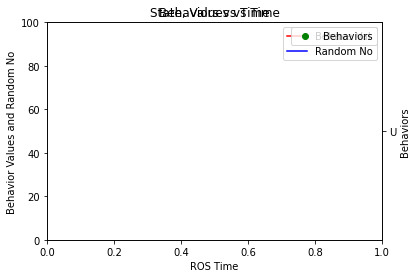

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',')
rostime1 = data1[:, 3]
state1 = data1[:, 6]
behave_val1 = data1[:, 4]
random_no1 = data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',')
rostime2 = data2[:, 0]
behave2 = data2[:, 1]

# Handle nan values
behave2 = np.array([b if not np.isnan(b) else 'Unknown' for b in behave2])

# Map behaviors
behave_map = {'Spinning': 'S', 'Pausing': 'P'}
behave2 = np.array([behave_map.get(b, 'U') for b in behave2])

# Create figure
fig, ax1 = plt.subplots()

# Plot state as stepped line
ax1.step(rostime1, state1, where='post')
ax1.set_ylabel('State')

# Plot ID as dots with numbers
for i, txt in enumerate(behave_val1):
    ax1.annotate(txt, (rostime1[i], state1[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot values as lines
ax1.plot(rostime1, behave_val1, color='red', label='Behave Val')
ax1.plot(rostime1, random_no1, color='blue', label='Random No')
ax1.set_ylabel('Behavior Values and Random No')
ax1.set_ylim([0, 100])

# Plot behaviors as dots
ax2 = ax1.twinx()
ax2.plot(rostime2, behave2, 'o', color='green', label='Behaviors')
ax2.set_ylabel('Behaviors')

# Clean rostime1 by removing NaN and Inf values
rostime1 = rostime1[~np.isnan(rostime1)]
rostime1 = rostime1[np.isfinite(rostime1)]

# Clean rostime2 by removing NaN and Inf values
rostime2 = rostime2[~np.isnan(rostime2)]
rostime2 = rostime2[np.isfinite(rostime2)]

# Check if rostime1 is not empty
if len(rostime1) > 0:
    xmin = np.min(rostime1)
    xmax = np.max(rostime1)
else:
    # Handle the case when rostime1 is empty
    xmin = 0
    xmax = 1

if len(rostime2) > 0:
    xmax = max(xmax, np.max(rostime2))

# Set x-axis limits
ax1.set_xlim([xmin, xmax])

ax1.set_xlabel('ROS Time')

# Add plot titles
ax1.set_title('State, Values vs Time')
ax2.set_title('Behaviors vs Time')

# Add legends
ax1.legend()
ax2.legend()

plt.show()


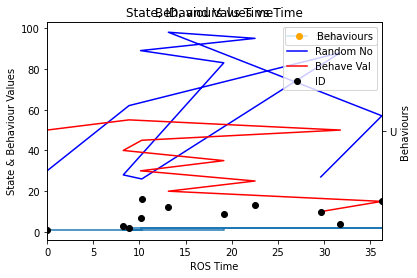

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',')
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',')

# Extract columns
rostime1 = data1[:,2]   
id1 = data1[:,0]      
state1 = data1[:,6]
behave_val1 = data1[:,4]
random_no1 = data1[:,5]    

rostime2 = data2[:,0]      
behave2 = data2[:,1]

# Handle nan values 
behave2 = np.array([b if not np.isnan(b) else 'Unknown' for b in behave2])

# Map behaviours
behave_map = {'Spinning':'S', 'Pausing':'P'}
behave2 = np.array([behave_map.get(b, 'U') for b in behave2])  

# Filter arrays
finite_rostime1 = rostime1[np.isfinite(rostime1)]
finite_rostime2 = rostime2[np.isfinite(rostime2)]

if len(finite_rostime1) > 0:
    xmin = np.min(finite_rostime1)
else:
    xmin = 0 

if len(finite_rostime2) > 0:
    xmin = min(xmin, np.min(finite_rostime2))
    
if len(finite_rostime1) > 0:
    xmax = np.max(finite_rostime1)
else:
    xmax = 100

if len(finite_rostime2) > 0:
    xmax = max(xmax, np.max(finite_rostime2))

# Create figure  
fig, ax1 = plt.subplots()

# Plot state stepped line
ax1.step(rostime1, state1, where='post', label='State')

# Plot random no as blue line
ax1.plot(rostime1, random_no1, color='blue', label='Random No') 

# Plot behave val as red line
ax1.plot(rostime1, behave_val1, color='red', label='Behave Val')

# Plot ID dots
ax1.plot(rostime1, id1, 'o', color='black', label='ID')   

# Plot behaviours as dots
ax2 = ax1.twinx()
ax2.plot(rostime2, behave2, 'o', color='orange', label='Behaviours')

# Set axes limits
ax1.set_xlim([xmin, xmax])

# Add labels  
ax1.set_ylabel('State & Behaviour Values')
ax2.set_ylabel('Behaviours') 

# Add titles
ax1.set_title('State, ID, and Values vs Time')
ax2.set_title('Behaviours vs Time')

# Add legends
ax1.legend()
ax2.legend()

ax1.set_xlabel('ROS Time')
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1)
rostime2, behave2 = data2[:, 0], data2[:, 1]

# Handle nan values
behave2 = np.where(np.isnan(behave2), 'Unknown', behave2)

# Map behaviors
behave_map = {'Spinning': 'S', 'Pausing': 'P'}
behave2 = np.where(behave2 == 'Unknown', 'U', behave_map.get(behave2, 'U'))

# Create figure
fig, ax1 = plt.subplots()

# Plot state as stepped line
ax1.step(rostime1, state1, where='post')
ax1.set_ylabel('State')

# Plot ID as dots with numbers
for i, txt in enumerate(ID1):
    ax1.annotate(txt, (rostime1[i], state1[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot values as lines
ax1.plot(rostime1, behave_val1, color='red', label='Behave Val')
ax1.plot(rostime1, random_no1, color='blue', label='Random No')
ax1.set_ylabel('Behavior Values and Random No')
ax1.set_ylim([0, 100])

# Plot behaviors as dots
ax2 = ax1.twinx()
ax2.plot(rostime2, behave2, 'o', color='green', label='Behaviors')
ax2.set_ylabel('Behaviors')

# Set x-axis limits based on the minimum and maximum ROS times
xmin = min(rostime1.min(), rostime2.min())
xmax = max(rostime1.max(), rostime2.max())
ax1.set_xlim([xmin, xmax])

ax1.set_xlabel('ROS Time')

# Add plot titles
ax1.set_title('State, Values vs Time')
ax2.set_title('Behaviors vs Time')

# Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

plt.show()


TypeError: unhashable type: 'numpy.ndarray'

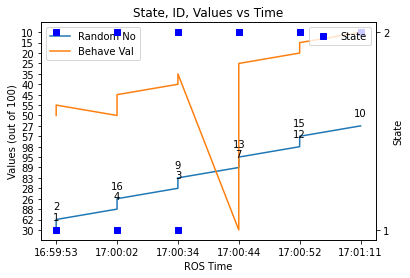

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)
rostime2, behave2 = data2[:, 1], data2[:, 0]

# Remove spaces from ROS time
rostime1 = np.char.replace(rostime1, ' ', '')
rostime2 = np.char.replace(rostime2, ' ', '')

# Filter non-numeric data from rostime2
rostime2 = [t for t in rostime2 if t.replace(':', '').isdigit()]

# Create figure
fig, ax1 = plt.subplots()

# Create a second y-axis
ax2 = ax1.twinx()

# Plot State on the right y-axis
ax2.plot(rostime1, state1, 's', color='blue', label='State')

# Plot Random No and Behave Val on the left y-axis
ax1.plot(rostime1, random_no1, label='Random No')
ax1.plot(rostime1, behave_val1, label='Behave Val')

# Plot ID as dots with labels
for i, txt in enumerate(ID1):
    ax1.annotate(txt, (rostime1[i], random_no1[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot Behavior as dots with labels
for i, b in enumerate(behave2):
    if b == 'Spinning':
        ax1.plot(rostime2[i], 100, 'o', color='green', label='S', markersize=5)
    elif b == 'Pausing':
        ax1.plot(rostime2[i], 100, 'o', color='red', label='P', markersize=5)

# Set the labels and titles
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')
ax1.set_title('State, ID, Values vs Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


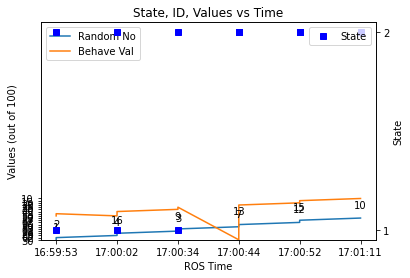

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)
rostime2, behave2 = data2[:, 1], data2[:, 0]

# Remove spaces from ROS time
rostime1 = np.char.replace(rostime1, ' ', '')
rostime2 = np.char.replace(rostime2, ' ', '')

# Filter non-numeric data from rostime2
rostime2 = [t for t in rostime2 if t.replace(':', '').isdigit()]

# Create figure
fig, ax1 = plt.subplots()

# Create a second y-axis
ax2 = ax1.twinx()

# Plot State on the right y-axis
ax2.plot(rostime1, state1, 's', color='blue', label='State')

# Plot Random No and Behave Val on the left y-axis
ax1.plot(rostime1, random_no1, label='Random No')
ax1.plot(rostime1, behave_val1, label='Behave Val')

# Plot ID as dots with labels
for i, txt in enumerate(ID1):
    ax1.annotate(txt, (rostime1[i], random_no1[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot Behavior as dots with labels
for i, b in enumerate(behave2):
    if b == 'Spinning':
        ax1.plot(rostime2[i], 0, 'o', color='green', label='S', markersize=5)
    elif b == 'Pausing':
        ax1.plot(rostime2[i], 0, 'o', color='red', label='P', markersize=5)

# Set the labels and titles
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')
ax1.set_title('State, ID, Values vs Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set y-axis limits from 0 to 100
ax1.set_ylim(0, 100)

plt.show()


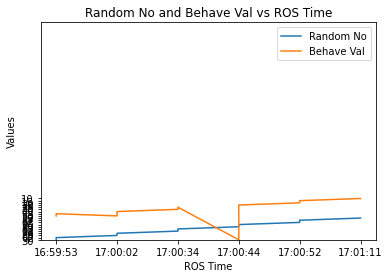

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)
rostime2, behave2 = data2[:, 1], data2[:, 0]

# Remove spaces from ROS time
rostime1 = np.char.replace(rostime1, ' ', '')
rostime2 = np.char.replace(rostime2, ' ', '')

# Filter non-numeric data from rostime2
rostime2 = [t for t in rostime2 if t.replace(':', '').isdigit()]

# Create figure
fig, ax1 = plt.subplots()

# Plot Random No and Behave Val on the left y-axis
ax1.plot(rostime1, random_no1, label='Random No')
ax1.plot(rostime1, behave_val1, label='Behave Val')

# Set the labels and titles
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values')
ax1.set_ylim(0, 100)  # Set the y-axis limits from 0 to 100
ax1.set_title('Random No and Behave Val vs ROS Time')
ax1.legend()

plt.show()


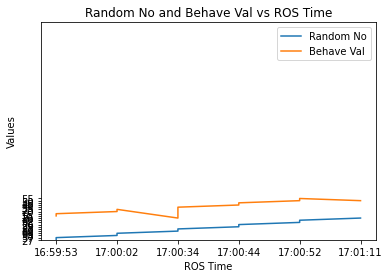

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)
rostime2, behave2 = data2[:, 1], data2[:, 0]


# Remove spaces from ROS time
rostime1 = np.char.replace(rostime1, ' ', '')
rostime2 = np.char.replace(rostime2, ' ', '')

# Create figure
fig, ax1 = plt.subplots()

# Reverse the data and set y-axis limits from 0 to 100
ax1.plot(rostime1, random_no1[::-1], label='Random No')
ax1.plot(rostime1, behave_val1[::-1], label='Behave Val')
ax1.set_ylim([0, 100])

# Set the labels and titles
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values')
ax1.set_title('Random No and Behave Val vs ROS Time')
ax1.legend()

plt.show()


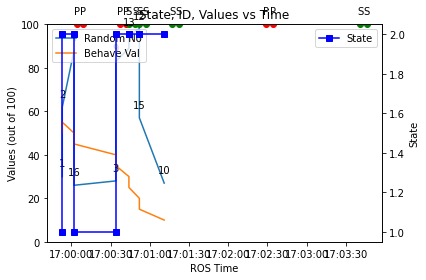

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def convert_time(rostime):
    return [datetime.strptime(t.strip(), '%H:%M:%S') for t in rostime]

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)
rostime2, behave2 = data2[:, 0], data2[:, 1]

# Convert data from string to appropriate numerical types
state1 = state1.astype(int)
behave_val1 = behave_val1.astype(float)
random_no1 = random_no1.astype(float)


def convert_time(rostime):
    cleaned_time = [t.replace(' ', '').strip() for t in rostime]
    return [datetime.strptime(t, '%H:%M:%S') for t in cleaned_time]

rostime1 = convert_time(rostime1)
rostime2 = convert_time(rostime2)




# Create figure
fig, ax1 = plt.subplots()

# Create a second y-axis
ax2 = ax1.twinx()

# Plot State on the right y-axis with a square style line
ax2.step(rostime1, state1, where='post', linestyle='-', marker='s', color='blue', label='State')

# Plot Random No and Behave Val on the left y-axis
ax1.plot(rostime1, random_no1, label='Random No')
ax1.plot(rostime1, behave_val1, label='Behave Val')

ax1.set_ylim([0, 100])

# Plot ID as dots with labels
for i, txt in enumerate(ID1):
    ax1.annotate(txt, (rostime1[i], int(random_no1[i])), textcoords="offset points", xytext=(0,10), ha='center')

# Plot Behavior as dots with labels
for i, b in enumerate(behave2):
    if b == 'Spinning':
        ax1.plot(rostime2[i], 100, 'o', color='green')
        ax1.annotate('S', (rostime2[i], 100), textcoords="offset points", xytext=(0,10), ha='center')
    elif b == 'Pausing':
        ax1.plot(rostime2[i], 100, 'o', color='red')
        ax1.annotate('P', (rostime2[i], 100), textcoords="offset points", xytext=(0,10), ha='center')

# Set the labels and titles
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')
ax1.set_title('State, ID, Values vs Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


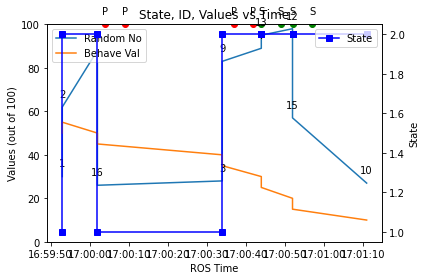

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def convert_time(rostime):
    cleaned_time = [t.replace(' ', '').strip() for t in rostime]
    return [datetime.strptime(t, '%H:%M:%S') for t in cleaned_time]

# Load data from the first CSV file
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]

rostime1 = convert_time(rostime1)

# Load data from the second CSV file
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)
rostime2, behave2 = data2[:, 0], data2[:, 1]

rostime2 = convert_time(rostime2)

# Take the maximum ROS time from the first set of data
max_time1 = max(rostime1)

# Filter the second set of data based on the maximum ROS time from the first set
valid_indices = [i for i, time in enumerate(rostime2) if time <= max_time1]
rostime2 = [rostime2[i] for i in valid_indices]
behave2 = [behave2[i] for i in valid_indices]

# Convert data from string to appropriate numerical types
state1 = state1.astype(int)
behave_val1 = behave_val1.astype(float)
random_no1 = random_no1.astype(float)

# Create figure
fig, ax1 = plt.subplots()

# Set axis limits
ax1.set_ylim([0, 100])

# Create a second y-axis
ax2 = ax1.twinx()

# Plot State on the right y-axis with a square style line
ax2.step(rostime1, state1, where='post', linestyle='-', marker='s', color='blue', label='State')

# Plot Random No and Behave Val on the left y-axis
ax1.plot(rostime1, random_no1, label='Random No')
ax1.plot(rostime1, behave_val1, label='Behave Val')

# Plot ID as dots with labels
for i, txt in enumerate(ID1):
    ax1.annotate(txt, (rostime1[i], int(random_no1[i])), textcoords="offset points", xytext=(0,10), ha='center')

# Plot Behavior as dots with labels
for i, b in enumerate(behave2):
    if b == 'Spinning':
        ax1.plot(rostime2[i], 100, 'o', color='green')
        ax1.annotate('S', (rostime2[i], 100), textcoords="offset points", xytext=(0,10), ha='center')
    elif b == 'Pausing':
        ax1.plot(rostime2[i], 100, 'o', color='red')
        ax1.annotate('P', (rostime2[i], 100), textcoords="offset points", xytext=(0,10), ha='center')

# Set the labels and titles
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')
ax1.set_title('State, ID, Values vs Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


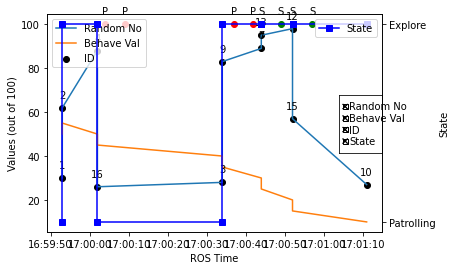

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.widgets import CheckButtons

def convert_time(rostime):
    cleaned_time = [t.replace(' ', '').strip() for t in rostime]
    return [datetime.strptime(t, '%H:%M:%S') for t in cleaned_time]

# Load data
# Replace these with the paths to your CSV files
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)

rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]
rostime2, behave2 = data2[:, 0], data2[:, 1]

rostime1 = convert_time(rostime1)
rostime2 = convert_time(rostime2)

# Filter second CSV data based on the last ROS time in first CSV
max_time1 = max(rostime1)
rostime2, behave2 = zip(*[(t, b) for t, b in zip(rostime2, behave2) if t <= max_time1])

# Convert to numeric types
state1 = state1.astype(int)
behave_val1 = behave_val1.astype(float)
random_no1 = random_no1.astype(float)

# Create figure
fig, ax1 = plt.subplots()

# Create second y-axis
ax2 = ax1.twinx()

# Plot data
line1, = ax1.plot(rostime1, random_no1, label='Random No')
line2, = ax1.plot(rostime1, behave_val1, label='Behave Val')
scatter1 = ax1.scatter(rostime1, random_no1, c='black', label='ID')
state_labels = ['Patrolling' if s == 1 else 'Explore' for s in state1]
line3, = ax2.step(rostime1, state_labels, where='post', linestyle='-', marker='s', color='blue', label='State')

# Annotations for ID and behavior
for i, txt in enumerate(ID1):
    ax1.annotate(txt, (rostime1[i], int(random_no1[i])), textcoords="offset points", xytext=(0,10), ha='center')
for i, b in enumerate(behave2):
    y_val = 100
    ax1.plot(rostime2[i], y_val, 'o', color='green' if b == 'Spinning' else 'red')
    ax1.annotate('S' if b == 'Spinning' else 'P', (rostime2[i], y_val), textcoords="offset points", xytext=(0,10), ha='center')

# Create checkboxes to toggle lines
rax = plt.axes([0.8, 0.4, 0.1, 0.2])
check = CheckButtons(rax, ('Random No', 'Behave Val', 'ID', 'State'), (True, True, True, True))

def toggle(label):
    if label == 'Random No': line1.set_visible(not line1.get_visible())
    elif label == 'Behave Val': line2.set_visible(not line2.get_visible())
    elif label == 'ID': scatter1.set_visible(not scatter1.get_visible())
    elif label == 'State': line3.set_visible(not line3.get_visible())
    plt.draw()

check.on_clicked(toggle)

# Set axis labels and title
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


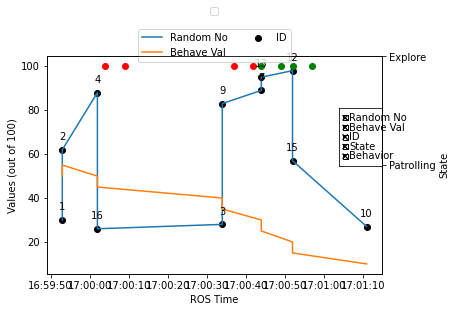

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.widgets import CheckButtons

def convert_time(rostime):
    cleaned_time = [t.replace(' ', '').strip() for t in rostime]
    return [datetime.strptime(t, '%H:%M:%S') for t in cleaned_time]

# Load data
# Replace these with the paths to your CSV files
data1 = np.genfromtxt('../logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
data2 = np.genfromtxt('../logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)

rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]
rostime2, behave2 = data2[:, 0], data2[:, 1]

rostime1 = convert_time(rostime1)
rostime2 = convert_time(rostime2)

# Filter second CSV data based on the last ROS time in first CSV
max_time1 = max(rostime1)
rostime2, behave2 = zip(*[(t, b) for t, b in zip(rostime2, behave2) if t <= max_time1])

# Convert to numeric types
state1 = state1.astype(int)
behave_val1 = behave_val1.astype(float)
random_no1 = random_no1.astype(float)

# Create figure
fig, ax1 = plt.subplots()

# Create second y-axis
ax2 = ax1.twinx()

# Plot data
line1, = ax1.plot(rostime1, random_no1, label='Random No')
line2, = ax1.plot(rostime1, behave_val1, label='Behave Val')
state_labels = ['Patrolling' if s == 1 else 'Explore' for s in state1]
scatter1 = ax1.scatter(rostime1, random_no1, c='black', label='ID')

behavior_dots = []
for i, b in enumerate(behave2):
    color = 'green' if b == 'Spinning' else 'red'
    dot, = ax1.plot(rostime2[i], 100, 'o', color=color)
    behavior_dots.append(dot)

# Annotations for ID and behavior
id_annotations = []
for i, txt in enumerate(ID1):
    annot = ax1.annotate(txt, (rostime1[i], int(random_no1[i])), textcoords="offset points", xytext=(0,10), ha='center')
    id_annotations.append(annot)

# Create checkboxes to toggle lines
rax = plt.axes([0.8, 0.5, 0.1, 0.2])
check = CheckButtons(rax, ('Random No', 'Behave Val', 'ID', 'State', 'Behavior'), (True, True, True, True, True))

def toggle(label):
    if label == 'Random No': 
        line1.set_visible(not line1.get_visible())
    elif label == 'Behave Val': 
        line2.set_visible(not line2.get_visible())
    elif label == 'ID': 
        scatter1.set_visible(not scatter1.get_visible())
        for annot in id_annotations:
            annot.set_visible(not annot.get_visible())
    elif label == 'Behavior':
        for dot in behavior_dots:
            dot.set_visible(not dot.get_visible())
    elif label == 'State': line3.set_visible(not line3.get_visible())
    plt.draw()

check.on_clicked(toggle)

# Set axis labels and title
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')
ax2.set_yticks([1, 2])
ax2.set_yticklabels(['Patrolling', 'Explore'])


# Move legend above the graph
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)

plt.show()


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.widgets import CheckButtons

def convert_time(rostime):
    cleaned_time = [t.replace(' ', '').strip() for t in rostime]
    return [datetime.strptime(t, '%H:%M:%S') for t in cleaned_time]

# Load data
# Replace these with paths to your own CSV files
data1 = np.genfromtxt('logs/0926/arlog_20230926170524.csv', delimiter=',', skip_header=1, dtype=str)
data2 = np.genfromtxt('logs/0926/patlog_20230926170521.csv', delimiter=',', skip_header=1, dtype=str)

rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]
rostime2, behave2 = data2[:, 0], data2[:, 1]

rostime1 = convert_time(rostime1)
rostime2 = convert_time(rostime2)

# Filter second CSV data based on last ROS time in first CSV
max_time1 = max(rostime1)
rostime2, behave2 = zip(*[(t, b) for t, b in zip(rostime2, behave2) if t <= max_time1])

# Convert to numeric types
state1 = state1.astype(int)
behave_val1 = behave_val1.astype(float)
random_no1 = random_no1.astype(float)

# Create figure and axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot data
line1, = ax1.plot(rostime1, random_no1, label='Random No')
line2, = ax1.plot(rostime1, behave_val1, label='Behave Val')
scatter1 = ax1.scatter(rostime1, random_no1, c='black', label='ID')

# State plotting
state_map = {1: 'Patrolling', 2: 'Explore'}
state_labels = [state_map[s] for s in state1]
line3, = ax2.step(rostime1, state1, where='post', linestyle='-', marker='s', color='blue', label='State')

# Behavior dots with annotations
behavior_dots = []
behavior_annotations = []
for i, b in enumerate(behave2):
    color = 'green' if b == 'Spinning' else 'red'
    dot, = ax1.plot(rostime2[i], 100, 'o', color=color)
    annot = ax1.annotate(b[0], (rostime2[i], 100), textcoords="offset points", xytext=(0,10), ha='center')
    behavior_dots.append(dot)
    behavior_annotations.append(annot)

# Annotations for ID
id_annotations = []
for i, txt in enumerate(ID1):
    annot = ax1.annotate(txt, (rostime1[i], int(random_no1[i])), textcoords="offset points", xytext=(0,10), ha='center')
    id_annotations.append(annot)

# Create checkboxes to toggle lines
rax = plt.axes([0.8, 0.5, 0.1, 0.2])
check = CheckButtons(rax, ('Random No', 'Behave Val', 'ID', 'State', 'Behavior'), (True, True, True, True, True))

def toggle(label):
    if label == 'Random No': 
        line1.set_visible(not line1.get_visible())
    elif label == 'Behave Val': 
        line2.set_visible(not line2.get_visible())
    elif label == 'ID': 
        scatter1.set_visible(not scatter1.get_visible())
        for annot in id_annotations:
            annot.set_visible(not annot.get_visible())
    elif label == 'State':
        line3.set_visible(not line3.get_visible())
    elif label == 'Behavior':
        for dot, annot in zip(behavior_dots, behavior_annotations):
            dot.set_visible(not dot.get_visible())
            annot.set_visible(not annot.get_visible())
    plt.draw()

check.on_clicked(toggle)

# Labels and title
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Values (out of 100)')
ax2.set_ylabel('State')

# Move legend above the graph
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)

plt.show()


FileNotFoundError: logs/0926/arlog_20230926170524.csv not found.

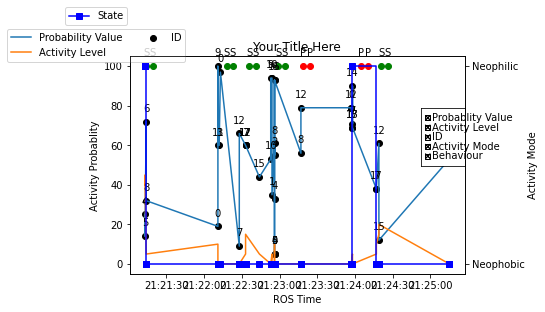

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.widgets import CheckButtons

def convert_time(rostime):
    cleaned_time = [t.replace(' ', '').strip() for t in rostime]
    return [datetime.strptime(t, '%H:%M:%S') for t in cleaned_time]

# Load data
# Replace these with paths to your own CSV files
data1 = np.genfromtxt('../logs/20231013212935_arlog.csv', delimiter=',', skip_header=1, dtype=str)
data2 = np.genfromtxt('../logs/20231013212928_patlog.csv', delimiter=',', skip_header=1, dtype=str)

rostime1, ID1, state1, behave_val1, random_no1 = data1[:, 3], data1[:, 0], data1[:, 6], data1[:, 4], data1[:, 5]
rostime2, behave2 = data2[:, 0], data2[:, 1]

rostime1 = convert_time(rostime1)
rostime2 = convert_time(rostime2)

# Filter second CSV data based on last ROS time in first CSV
max_time1 = max(rostime1)
rostime2, behave2 = zip(*[(t, b) for t, b in zip(rostime2, behave2) if t <= max_time1])

# Convert to numeric types
state1 = state1.astype(int)
behave_val1 = behave_val1.astype(float)
random_no1 = random_no1.astype(float)

# Create figure and axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('Your Title Here')



# Plot data
line1, = ax1.plot(rostime1, random_no1, label='Probability Value')
line2, = ax1.plot(rostime1, behave_val1, label='Activity Level')
# state_labels = ['Patrolling' if s == 1 else 'Explore' for s in state1]
scatter1 = ax1.scatter(rostime1, random_no1, c='black', label='ID')

# State plotting
state_map = {0: 'Neophobic', 1: 'Neophilic'}
state_labels = [state_map[s] for s in state1]
line3, = ax2.step(rostime1, state1, where='post', linestyle='-', marker='s', color='blue', label='State')

# Behavior dots with annotations
behavior_dots = []
behavior_annotations = []
for i, b in enumerate(behave2):
    color = 'green' if b == 'Spinning' else 'red'
    dot, = ax1.plot(rostime2[i], 100, 'o', color=color)
    annot = ax1.annotate(b[0], (rostime2[i], 100), textcoords="offset points", xytext=(0,10), ha='center')
    behavior_dots.append(dot)
    behavior_annotations.append(annot)

# Annotations for ID
id_annotations = []
for i, txt in enumerate(ID1):
    annot = ax1.annotate(txt, (rostime1[i], int(random_no1[i])), textcoords="offset points", xytext=(0,10), ha='center')
    id_annotations.append(annot)

# Create checkboxes to toggle lines
rax = plt.axes([0.8, 0.5, 0.1, 0.2])
check = CheckButtons(rax, ('Probablity Value', 'Activity Level', 'ID', 'Activity Mode', 'Behaviour'), (True, True, True, True, True))

def toggle(label):
    if label == 'Probablity Value': 
        line1.set_visible(not line1.get_visible())
    elif label == 'Activity Level': 
        line2.set_visible(not line2.get_visible())
    elif label == 'ID': 
        scatter1.set_visible(not scatter1.get_visible())
        for annot in id_annotations:
            annot.set_visible(not annot.get_visible())
    elif label == 'Activity Mode':
        line3.set_visible(not line3.get_visible())
    elif label == 'Behaviour':
        for dot, annot in zip(behavior_dots, behavior_annotations):
            dot.set_visible(not dot.get_visible())
            annot.set_visible(not annot.get_visible())
    plt.draw()

check.on_clicked(toggle)

# Labels and title
ax1.set_xlabel('ROS Time')
ax1.set_ylabel('Activity Probablity')
ax2.set_ylabel('Activity Mode')
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Neophobic', 'Neophilic'])



# Move legend above the graph
ax1.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.15), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.25), ncol=2)

plt.show()
